In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [22]:
Info1 = np.loadtxt('CornerSolution0.6CFL.txt', delimiter=' ', max_rows=1, dtype='object')
h = float(Info1[1])
L = float(Info1[3])
t1 = float(Info1[5])

Info2 = np.loadtxt('CornerSolution1CFL.txt', delimiter=' ', max_rows=1, dtype='object')
t2 = float(Info2[5])

Info3 = np.loadtxt('CornerSolution1.01CFL.txt', delimiter=' ', max_rows=1, dtype='object')
t3 = float(Info3[5])

InfoG = np.loadtxt('CornerSolutionGauss.txt', delimiter=' ', max_rows=1, dtype='object')
tG = float(InfoG[5])


Data1 = np.loadtxt('CornerSolution0.6CFL.txt', delimiter=' ', skiprows=1)
Data2 = np.loadtxt('CornerSolution1CFL.txt', delimiter=' ', skiprows=1)
Data3 = np.loadtxt('CornerSolution1.01CFL.txt', delimiter=' ', skiprows=1)
DataG = np.loadtxt('CornerSolutionGauss.txt', delimiter=' ', skiprows=1)


x = np.linspace(0, L, len(Data1[0]))
xG = np.linspace(0, L, len(DataG[0]))
time1 = np.linspace(0, 20, int(20/t1))
time2 = np.linspace(0, 20, int(20/t2))
time3 = np.linspace(0, 20, int(20/t3))
timeG = np.linspace(0, 20, int(20/tG))

def realSol(x,t, L):
    return np.sin(4*np.pi*(x-t)/L)

inf04 = np.loadtxt('CornerSolution0.4h.txt', delimiter=' ', max_rows=1, dtype='object')
t04 = float(inf04[5])
h04 = float(inf04[1])


data04 = np.loadtxt('CornerSolution0.4h.txt', delimiter=' ', skiprows=1)
x04 = np.linspace(0, L, len(data04[0]))

error4 = -1
for i in range(0, len(data04)-1):
    error4Curr = np.max(np.abs((data04[i] - realSol(x04, t04*i, L))))
    if (error4Curr >= error4):
        error4 = error4Curr

inf01 = np.loadtxt('CornerSolution0.1h.txt', delimiter=' ', max_rows=1, dtype='object')
t01 = float(inf01[5])
h01 = float(inf01[1])

data01 = np.loadtxt('CornerSolution0.1h.txt', delimiter=' ', skiprows=1)
x01 = np.linspace(0, L, len(data01[0]))

error1 = -1
for i in range(0, len(data01)-1):
    error1Curr = np.max(np.abs((data01[i] - realSol(x01, t01*i, L))))
    if (error1Curr >= error1):
        error1 = error1Curr


IndexError: index 39 is out of bounds for axis 0 with size 39

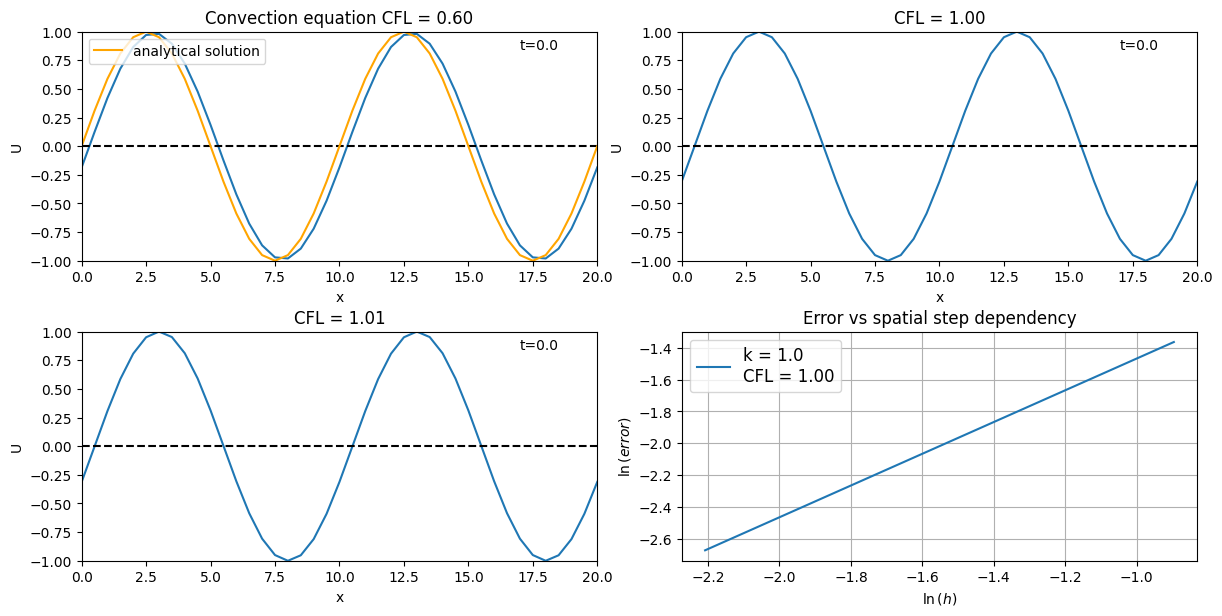

In [32]:
fig, ax = plt.subplots(2,2,figsize=(12,6))
fig.tight_layout(h_pad=3, pad=1.5, w_pad=3)
def anim(i):
    ax[0][0].clear()
    ax[0][0].plot(x, Data1[i])
    ax[0][0].set_ylim(-1, 1)
    ax[0][0].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax[0][0].set_xlim(0,20)
    ax[0][0].text(17.0, 0.85, 't={}'.format(round(time1[i],2)))
    ax[0][0].set_title('Convection equation CFL = 0.60')
    ax[0][0].set_xlabel('x')
    ax[0][0].set_ylabel('U')
    ax[0][0].plot(x, realSol(x, i*t1, L), color='orange', label='analytical solution')
    ax[0][0].legend(loc='upper left')

    
    ax[0][1].clear()
    ax[0][1].plot(x, Data2[i])
    ax[0][1].set_ylim(-1, 1)
    ax[0][1].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax[0][1].set_xlim(0,20)
    ax[0][1].text(17.0, 0.85, 't={}'.format(round(time2[i],2)))
    ax[0][1].set_title('CFL = 1.00')
    ax[0][1].set_xlabel('x')
    ax[0][1].set_ylabel('U')
    

    ax[1][0].clear()
    ax[1][0].plot(x, Data3[i])
    ax[1][0].set_ylim(-1, 1)
    ax[1][0].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax[1][0].set_xlim(0,20)
    ax[1][0].text(17.0, 0.85, 't={}'.format(round(time3[i],1)))
    ax[1][0].set_title('CFL = 1.01')
    ax[1][0].set_xlabel('x')
    ax[1][0].set_ylabel('U')
    
    ax[1][1].clear()
    k = (np.log(error4)-np.log(error1))/(np.log(h04) - np.log(h01))
    ax[1][1].plot([np.log(h01), np.log(h04)], [np.log(error1), np.log(error4)], label = 'k = {}'.format(round(k,2)) + '\n' + 'CFL = 1.00')
    ax[1][1].set_title('Error vs spatial step dependency')
    ax[1][1].grid('Major')
    ax[1][1].set_xlabel(r"$\ln{(h)}$")
    ax[1][1].set_ylabel(r"$\ln{(error)}$")
    ax[1][1].legend(fontsize = 12)

an = FuncAnimation(fig, anim, frames=len(Data1)-1, interval=15)
an.save('TransferCorner.gif',writer='pillow',fps=100,dpi=80)

In [33]:
InfoLax = np.loadtxt('LaxSolution0.6.txt', delimiter=' ', max_rows=1, dtype='object')
h = float(InfoLax[1])
L = float(InfoLax[3])
t = float(InfoLax[5])

DataLax = np.loadtxt('LaxSolution0.6.txt', delimiter=' ', skiprows=1)

InfoLax2 = np.loadtxt('LaxSolution1.txt', delimiter=' ', max_rows=1, dtype='object')
h = float(InfoLax[1])
L = float(InfoLax[3])
t2 = float(InfoLax[5])

DataLax2 = np.loadtxt('LaxSolution1.txt', delimiter=' ', skiprows=1)

InfoLax3 = np.loadtxt('LaxSolution1.txt', delimiter=' ', max_rows=1, dtype='object')
h = float(InfoLax[1])
L = float(InfoLax[3])
t3 = float(InfoLax[5])

DataLax3 = np.loadtxt('LaxSolution1.01.txt', delimiter=' ', skiprows=1)

xLax = np.linspace(0, L, len(DataLax[0]))
timeLax = np.linspace(0, 20, int(20/t))
timeLax2 = np.linspace(0, 20, int(20/t2))
timeLax3 = np.linspace(0, 20, int(20/t3))


inf04 = np.loadtxt('LaxSolution0.4h.txt', delimiter=' ', max_rows=1, dtype='object')
t04 = float(inf04[5])
h04 = float(inf04[1])


data04 = np.loadtxt('LaxSolution0.4h.txt', delimiter=' ', skiprows=1)
x04 = np.linspace(0, L, len(data04[0]))

error4 = -1
for i in range(0, len(data04)-1):
    error4Curr = np.max(np.abs((data04[i] - realSol(x04, t04*i, L))))
    if (error4Curr >= error4):
        error4 = error4Curr

inf01 = np.loadtxt('LaxSolution0.1h.txt', delimiter=' ', max_rows=1, dtype='object')
t01 = float(inf01[5])
h01 = float(inf01[1])

data01 = np.loadtxt('LaxSolution0.1h.txt', delimiter=' ', skiprows=1)
x01 = np.linspace(0, L, len(data01[0]))

error1 = -1
for i in range(0, len(data01)-1):
    error1Curr = np.max(np.abs((data01[i] - realSol(x01, t01*i, L))))
    if (error1Curr >= error1):
        error1 = error1Curr

IndexError: index 49 is out of bounds for axis 0 with size 49

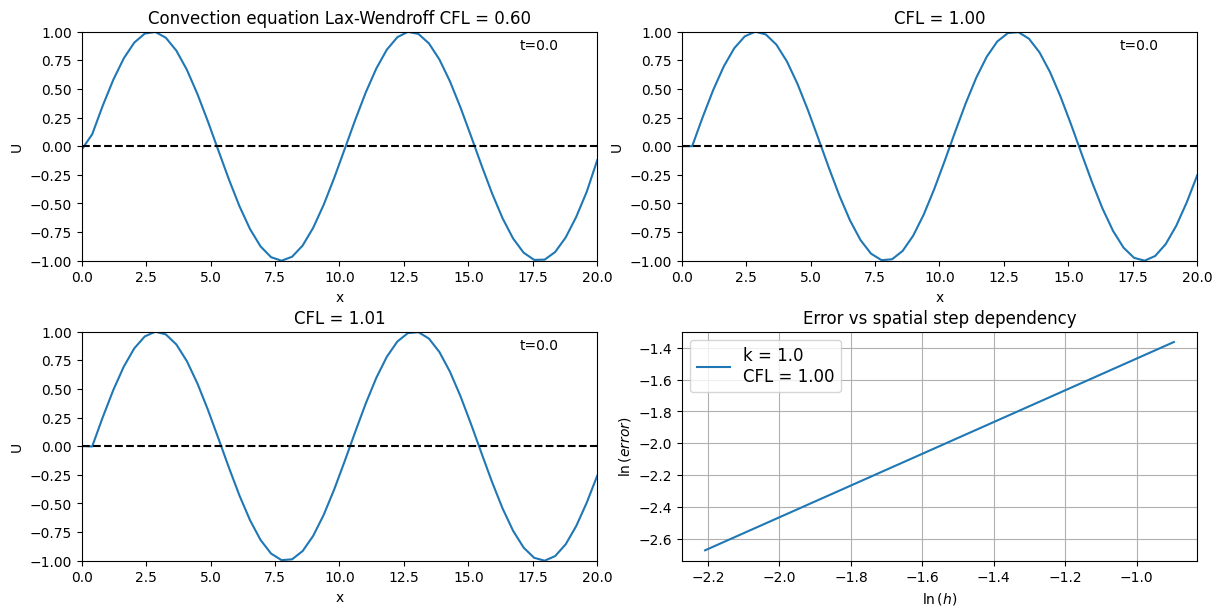

In [35]:
fig1, ax1 = plt.subplots(2,2, figsize=(12,6))
fig1.tight_layout(h_pad=3, pad=1.5, w_pad=3)
def anim(i):
    ax1[0][0].clear()
    ax1[0][0].plot(xLax, DataLax[i])
    ax1[0][0].set_ylim(-1, 1)
    ax1[0][0].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax1[0][0].set_xlim(0,20)
    ax1[0][0].text(17.0, 0.85, 't={}'.format(round(timeLax[i],2)))
    ax1[0][0].set_title('Convection equation Lax-Wendroff CFL = 0.60')
    ax1[0][0].set_xlabel('x')
    ax1[0][0].set_ylabel('U')

    ax1[0][1].clear()
    ax1[0][1].plot(xLax, DataLax2[i])
    ax1[0][1].set_ylim(-1, 1)
    ax1[0][1].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax1[0][1].set_xlim(0,20)
    ax1[0][1].text(17.0, 0.85, 't={}'.format(round(timeLax2[i],2)))
    ax1[0][1].set_title('CFL = 1.00')
    ax1[0][1].set_xlabel('x')
    ax1[0][1].set_ylabel('U')

    ax1[1][0].clear()
    ax1[1][0].plot(xLax, DataLax3[i])
    ax1[1][0].set_ylim(-1, 1)
    ax1[1][0].hlines(0, 0, 20, colors='black', linestyles='dashed')
    ax1[1][0].set_xlim(0,20)
    ax1[1][0].text(17.0, 0.85, 't={}'.format(round(timeLax3[i],2)))
    ax1[1][0].set_title('CFL = 1.01')
    ax1[1][0].set_xlabel('x')
    ax1[1][0].set_ylabel('U')

    ax1[1][1].clear()
    k = (np.log(error4)-np.log(error1))/(np.log(h04) - np.log(h01))
    ax1[1][1].plot([np.log(h01), np.log(h04)], [np.log(error1), np.log(error4)], label = 'k = {}'.format(round(k,2)) + '\n' + 'CFL = 1.00')
    ax1[1][1].set_title('Error vs spatial step dependency')
    ax1[1][1].grid('Major')
    ax1[1][1].set_xlabel(r"$\ln{(h)}$")
    ax1[1][1].set_ylabel(r"$\ln{(error)}$")
    ax1[1][1].legend(fontsize = 12)


an = FuncAnimation(fig1, anim, frames=len(DataLax)-1, interval=15)
an.save('TransferLax.gif', writer='pillow', fps = 100, dpi=80)